In [1]:
import mne
import numpy as np

job_arg = 8

In [2]:

# read mne-python format
raw = mne.io.read_raw_fif('OBCI_19_raw.fif')
#raw = mne.io.concatenate_raws([raw_1, raw_2])
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage, verbose=False)
raw.load_data()
raw.pick_types(emg=True, eeg=True, stim=True, exclude=[])

Opening raw data file OBCI_19_raw.fif...
Isotrak not found
    Range : 0 ... 1336504 =      0.000 ...  1336.504 secs
Ready.
Reading 0 ... 1336504  =      0.000 ...  1336.504 secs...


<Raw | OBCI_19_raw.fif, 17 x 1336505 (1336.5 s), ~173.4 MB, data loaded>

Opening raw-browser...


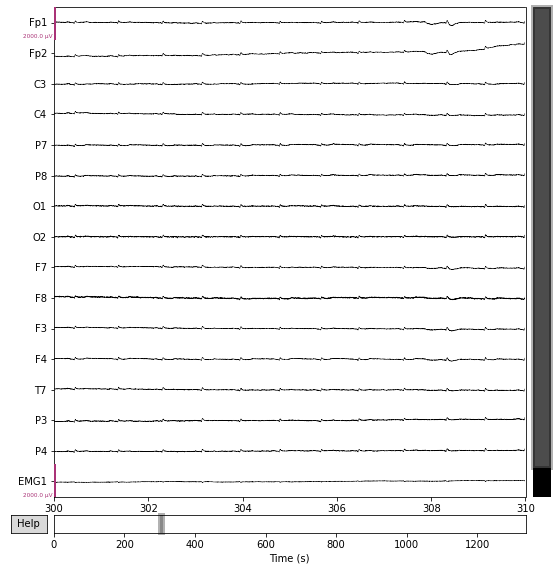

TypeError: plot() got an unexpected keyword argument 'channel'

In [12]:
plt = raw.plot(n_channels = 16, start = 300, duration = 10, scalings = dict(eeg = 10e-4), theme = 'dark')
plt = raw.plot_psd(fmax=60.)
plt = raw.plot_psd(fmax=60., average=True)
plt = raw.plot_psd(fmin=90., fmax=500.0)
plt = raw.plot_psd(fmin=90., fmax=500., average=True)

In [4]:
freqs = np.arange(50., 451., 50.)
#notch_widths = freqs/200.
#notch_widths[0] = 10.

#print(notch_widths)
raw_avg_ref = raw.copy().set_eeg_reference(ref_channels='average')
raw_notch = raw_avg_ref.copy().notch_filter(freqs, picks = ['eeg', 'emg'],  n_jobs=job_arg)
# spectrum fit doesn't support cuda
#raw_notch = raw.copy().notch_filter(freqs, method='spectrum_fit', picks = ['eeg'], n_jobs=8, filter_length='8s')
# raw_notch.plot_psd()
# raw_notch.plot_psd(average=True)
# raw_notch.plot_psd(fmin=30., fmax=60., average=True)
event_ids = {
    'clench': ord('l'),
    'right': ord('r'),
    'neutral': ord('n'),
    'fixation': ord('f'),
    'ready': ord('k'),
}

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 6601 samples (6.601 sec)



[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  13 out of  16 | elapsed:    4.2s remaining:    1.0s
[Parallel(n_jobs=8)]: Done  16 out of  16 | elapsed:    4.3s finished


Opening raw-browser...


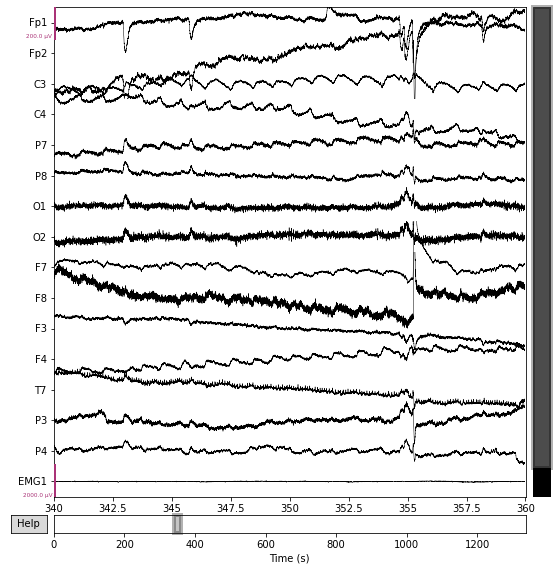

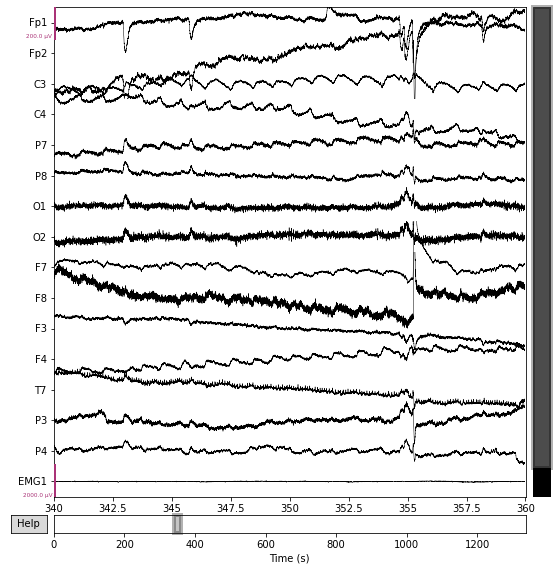

In [8]:
raw_notch.plot(n_channels = 16, start = 340, duration = 20, scalings = dict(eeg = 10e-5), theme = 'dark')

In [9]:
decim = 4
scalings = dict(eeg = 10e-5, emg = 5e-5)

raw_notch.filter(l_freq=0.1, h_freq=49., n_jobs=job_arg)

events = mne.find_events(raw_notch)
reject = dict(eeg=150e-6)
epochs = mne.Epochs(raw_notch, events, event_id=event_ids, reject=reject, preload=True, tmin=-0.5, tmax = 3, picks = ['C3', 'P3', 'P4', 'C4'])
#epochs.filter(l_freq=12, h_freq=20., n_jobs=job_arg)
# epochs = mne.Epochs(raw_notch, events, event_id=event_ids, preload=True)
epochs_ds = epochs.resample(sfreq=250., n_jobs=job_arg)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 49 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 49.00 Hz
- Upper transition bandwidth: 12.25 Hz (-6 dB cutoff frequency: 55.12 Hz)
- Filter length: 33001 samples (33.001 sec)



[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


339 events found
Event IDs: [ 53 102 107 108 110 114]


[Parallel(n_jobs=8)]: Done  12 out of  15 | elapsed:    1.6s remaining:    0.4s
[Parallel(n_jobs=8)]: Done  15 out of  15 | elapsed:    1.6s finished


Not setting metadata
338 matching events found
Setting baseline interval to [-0.5, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 338 events and 3501 original time points ...
    Rejecting  epoch based on EEG : ['C3', 'P3', 'P4', 'C4']
    Rejecting  epoch based on EEG : ['C3', 'P3', 'P4', 'C4']
    Rejecting  epoch based on EEG : ['C3', 'P3', 'P4', 'C4']
    Rejecting  epoch based on EEG : ['C3', 'P3', 'P4', 'C4']
    Rejecting  epoch based on EEG : ['C3', 'P3', 'P4', 'C4']
    Rejecting  epoch based on EEG : ['P3']
    Rejecting  epoch based on EEG : ['C3', 'P3', 'P4']
    Rejecting  epoch based on EEG : ['C3', 'P3', 'P4', 'C4']
    Rejecting  epoch based on EEG : ['C3']
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['P3']
    Rejecting  epoch based on EEG : ['C3', 'P3', 'P4', 'C4']
    Rejecting  epoch based on EEG : ['P3']
    Rejecting  epoch based on EEG : ['C3']
    Rejecting  epo

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 1032 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 1216 out of 1216 | elapsed:    0.3s finished


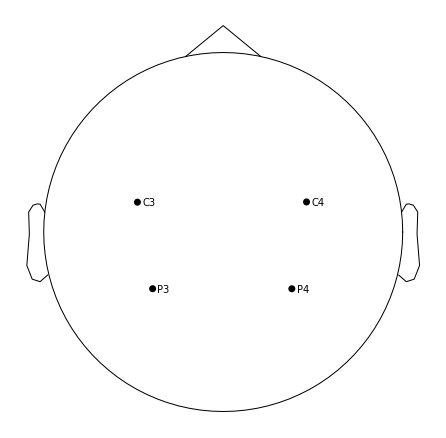

Not setting metadata
36 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
36 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


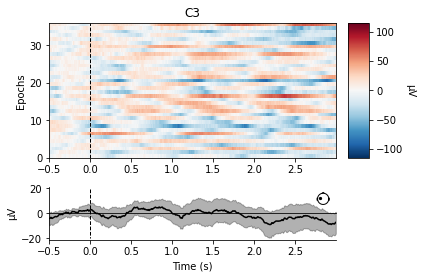

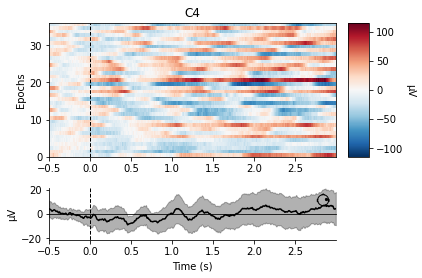

Not setting metadata
35 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
35 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


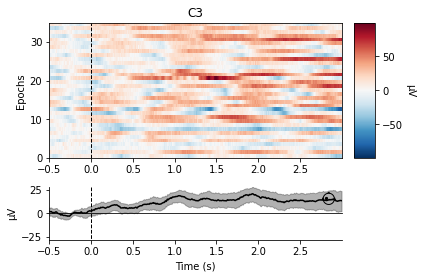

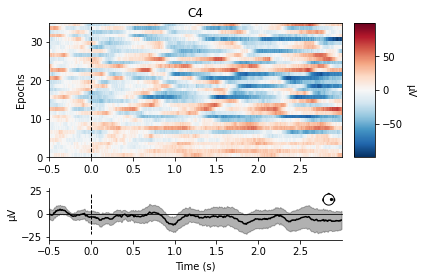

Not setting metadata
34 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
34 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


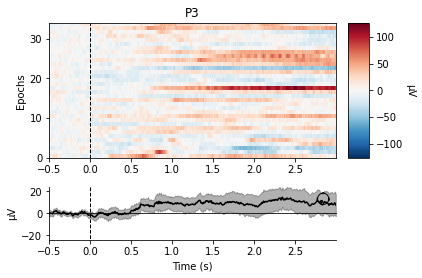

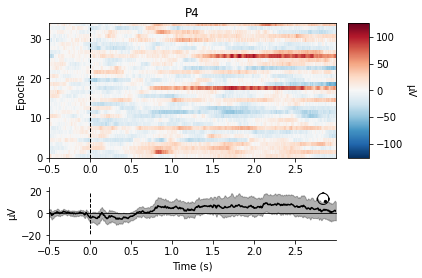

[<Figure size 432x288 with 4 Axes>, <Figure size 432x288 with 4 Axes>]

In [15]:
clench_epochs = epochs_ds['clench']
right_epochs = epochs_ds['right']
neutral_epochs = epochs_ds['neutral']

clench_epochs.plot_sensors(show_names=True)

clench_epochs.plot_image(picks=['C3', 'C4'])
right_epochs.plot_image(picks=['C3', 'C4'])
neutral_epochs.plot_image(picks=['P3', 'P4'])

# write a function that plots clench activation for C3 sensor in 18 Hz to 26 Hz frequency range

combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


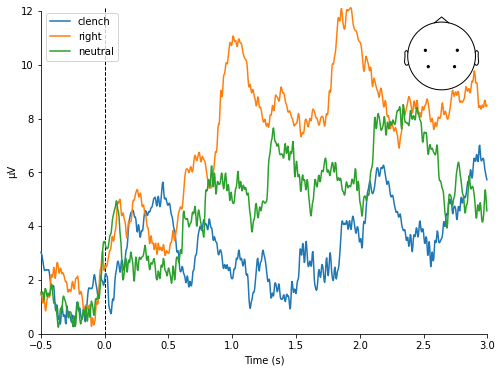

[<Figure size 576x432 with 2 Axes>]

In [11]:
clench_evoked = clench_epochs.average()
right_evoked = right_epochs.average()
neutral_evoked = neutral_epochs.average()

mne.viz.plot_compare_evokeds(dict(clench=clench_evoked, right=right_evoked, neutral=neutral_evoked), legend='upper left', show_sensors='upper right')

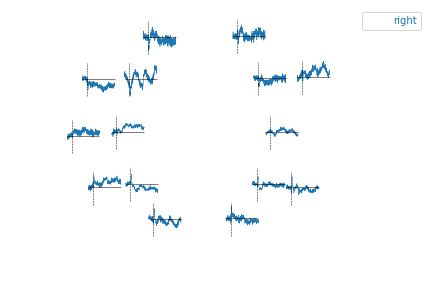

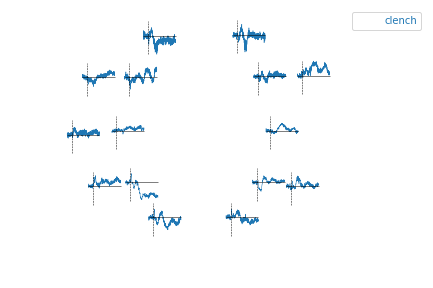

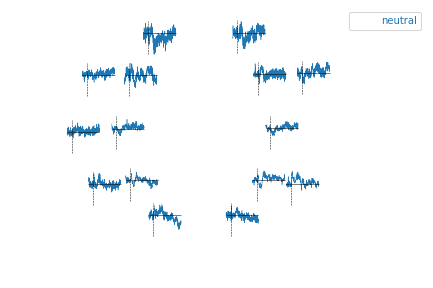

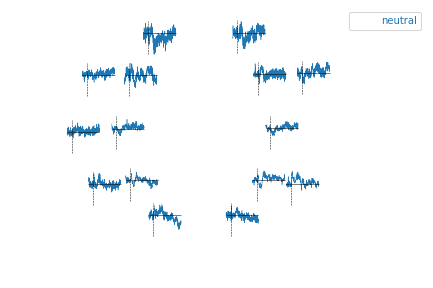

In [87]:
mne.viz.plot_evoked_topo(right_evoked)
mne.viz.plot_evoked_topo(clench_evoked)
mne.viz.plot_evoked_topo(neutral_evoked)

Ok we'll do some frequency analysis to see if we can see a signal in a particular frequency.

    Using multitaper spectrum estimation with 7 DPSS windows


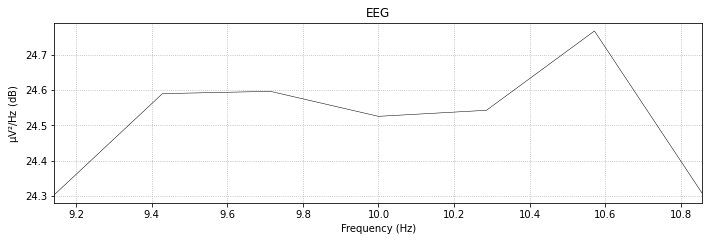

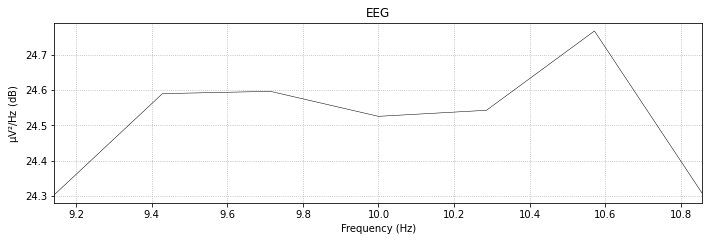

In [88]:
right_epochs.plot_psd(fmin=9, fmax=11., average=True, spatial_colors=False, picks=['C3'])